In [2]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#  Ensemble Learning (Stacking Regressor)

# Loading the preprocessed dataset

In [3]:

df = pd.read_csv('data_nextday.csv')

# Defining features and target

In [ ]:

features = ['temperature', 'humidity', 'windSpeed', 'pressure', 'precipIntensity', 'hour', 'day_of_week', 'month', 'season']
X = df[features]
y = df['demand_next_day']

# Spliting data into train/test sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the base models (Random Forest and XGBoost)

In [ ]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fiting the base models

In [ ]:

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Define the meta-model (Linear Regression)

In [ ]:

meta_model = LinearRegression()


# Creating the stacking model using base models and the meta-model

In [ ]:

stacked_model = StackingRegressor(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_model
)

# Training the stacked model

In [ ]:

stacked_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                  final_estimator=LinearRegression())

# Making predictions

In [ ]:

y_pred_stacked = stacked_model.predict(X_test)

# Evaluating the stacked model

In [ ]:

mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
mape_stacked = (abs(y_test - y_pred_stacked) / y_test).mean() * 100

# Output the evaluation metrics
print(f'Ensemble Model (Stacking) - MAE: {mae_stacked}')
print(f'Ensemble Model (Stacking) - RMSE: {rmse_stacked}')
print(f'Ensemble Model (Stacking) - MAPE: {mape_stacked}%')

Ensemble Model (Stacking) - MAE: 0.021625558431865262
Ensemble Model (Stacking) - RMSE: 0.028932817711575763
Ensemble Model (Stacking) - MAPE: 36.56318610290177%


# Visualizing the actual vs predicted values

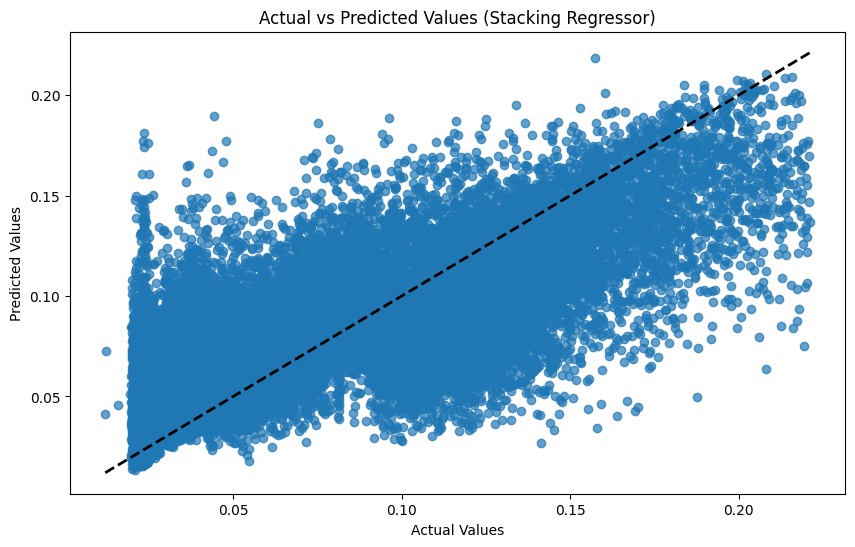

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stacked, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Stacking Regressor)')
plt.show()